# Report 1 Submission : 
## Zero- and one-dimensional simulations with Cantera

Course: Numerical Simulation of reactive flows\
Winter Semester 2025/2026\
Technische Universität Braunschweig\
Institut für Flugantriebe und Strömungsmaschinen (IFAS)\
Jun.-Prof. Federica Ferraro

--> Submission by SHUBHAM KUMAR, Matriculation Number: 5547548\
Course of study: Computational Sciences in Engineering (CSE)

In [1]:
import cantera as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time as time

gas = ct.Solution('SK54.yaml')

# given parameters ----------
fuel1 = 'H2:0.4, NC12H26:0.6'
fuel2 = 'NC12H26:1'
air   = 'N2:0.79, O2:0.21'

## Exercise (a) and (b)

In [3]:
# solving (a) using function definition ---------------------------------------------------

T0, P0 = 1800, ct.one_atm        # K, Pa
phi_values = [0.8, 2]            # equivalence ratio
species_to_plot = ['O2', 'OH', 'H2O', 'CO', 'CO2', 'C2H2', 'C6H12']
Y_ref = 'OH'                      # OH radical to monitor for ignition delay computation

def ignition_delay(states, species):
    """
    This function computes the ignition delay from the occurence of the
    peak in species' concentration.
    """
    i_ign = states(species).Y.argmax()
    return states.t[i_ign]


t_int = 0.05 #4e-5                                          # setting integration time = simulation physical time (s)
storage = []

def mass_fract_plotter(fuel):
    results_storage = {}                                  # dict to store results for each phi value
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))         # Y_i : subplot 1x2
    
    for i, phi in enumerate(phi_values):
        gas = ct.Solution('SK54.yaml')
        gas.set_equivalence_ratio(phi, fuel, air)         # setting equivalence ratio, fuel, oxidizer
        gas.TP = T0, P0                                   # setting gas state
    
        # defining reactor ---------------
        r = ct.IdealGasConstPressureReactor(gas, name="Batch Reactor")
        reactor_network = ct.ReactorNet([r])              # creating reactor, and reactor network of 1 reactor
        time_history = ct.SolutionArray(gas, extra=['t'])
    
        # time marching loop --------------
        t, counter = 0, 1                                 # initial time, step counter
        cpu_t0 = time.time()                              # tic --> starting cpu clock
        
        while t < t_int:
            t = reactor_network.step()                    # Advances by one adaptive step
            if not counter % 10:
                time_history.append(r.thermo.state, t=t)
            counter += 1
        
        cpu_t1 = time.time()                              # toc --> cpu_stop_time

        print(f"Simulation for fuel ({fuel}), and air ({air}) mixture at phi = {phi} completed ...")
        
        # for spec in species_to_plot:
        tau = ignition_delay(time_history, Y_ref)
        # tau_list.append(tau)
        print(f'   - Ignition delay wrt specie {Y_ref} : {tau:.3e} s')
        
        print(f"   - finished in cpu_time {cpu_t1 - cpu_t0:.2f}s")
        results_storage[phi] = time_history  
        
        # plotting ---------------------------  
        for spec in species_to_plot:
            ax[i].plot(time_history.t, time_history(spec).Y, label=spec)
    
        ax[i].set_title(f'Fuel2-air : Species Mass Fractions (phi = {phi})')
        ax[i].set_xlabel('Time (s)') ; ax[i].set_ylabel('Mass Fraction $Y_i$')
        ax[i].legend()
        ax[i].grid(True, alpha=0.3)
        ax[i].set_xscale('log')
    
    plt.tight_layout()
    # plt.savefig("plot_b.png", dpi=900)
    plt.show()
    return results_storage
    

Simulation for fuel (H2:0.4, NC12H26:0.6), and air (N2:0.79, O2:0.21) mixture at phi = 0.8 completed ...
   - Ignition delay wrt specie OH : 3.183e-05 s
   - finished in cpu_time 0.15s
Simulation for fuel (H2:0.4, NC12H26:0.6), and air (N2:0.79, O2:0.21) mixture at phi = 2 completed ...
   - Ignition delay wrt specie OH : 1.733e-05 s
   - finished in cpu_time 0.16s


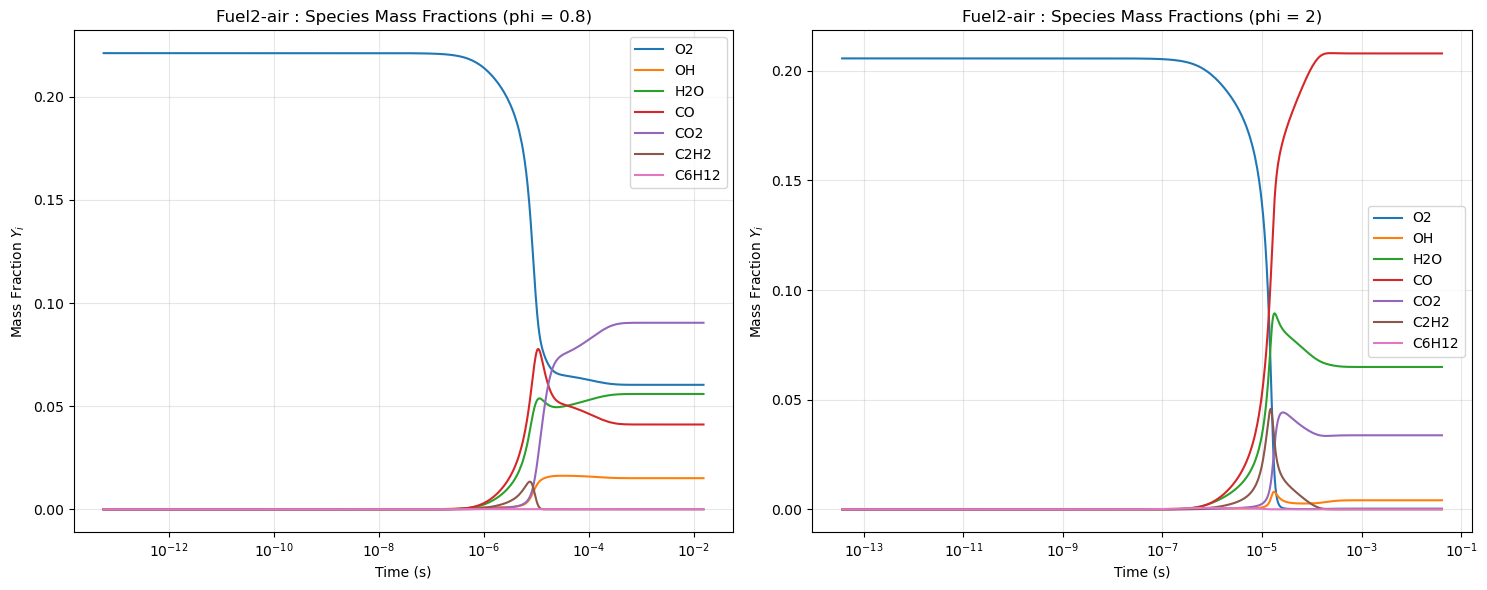

In [4]:
data_fuel1 = mass_fract_plotter(fuel1)

Simulation for fuel (NC12H26:1), and air (N2:0.79, O2:0.21) mixture at phi = 0.8 completed ...
   - Ignition delay wrt specie OH : 3.524e-05 s
   - finished in cpu_time 0.15s
Simulation for fuel (NC12H26:1), and air (N2:0.79, O2:0.21) mixture at phi = 2 completed ...
   - Ignition delay wrt specie OH : 1.813e-05 s
   - finished in cpu_time 0.16s


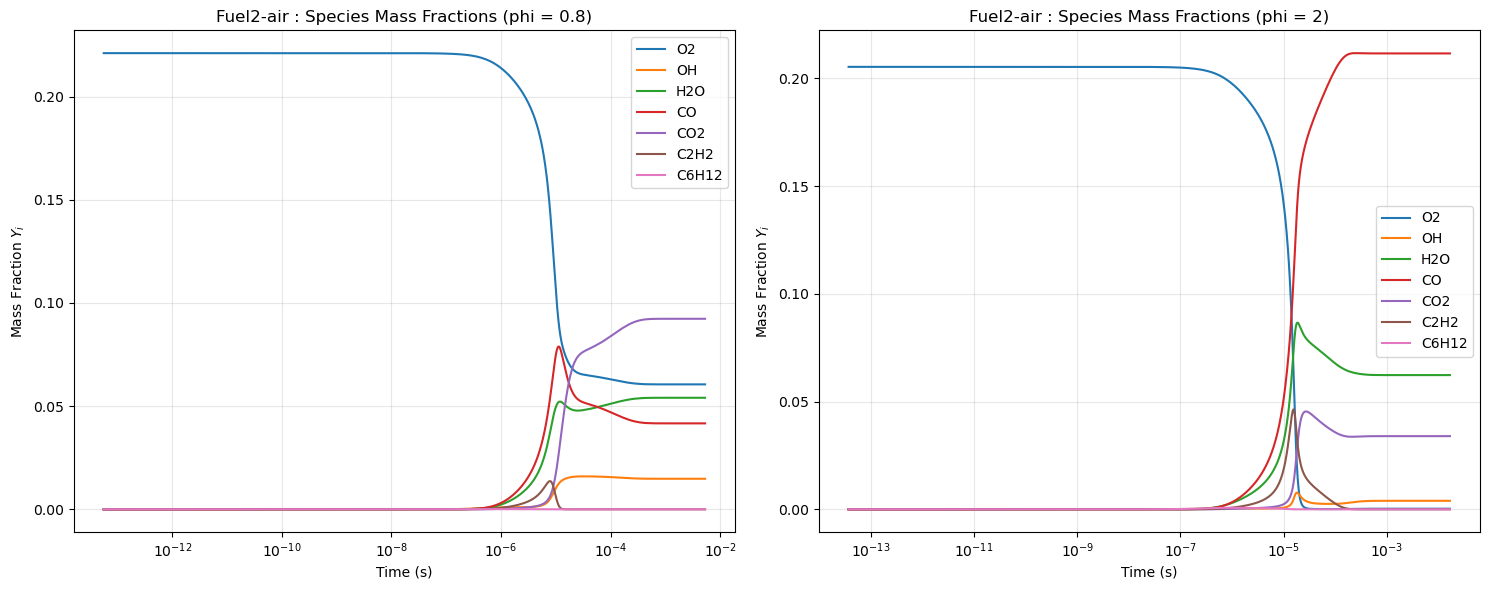

In [5]:
# solving (b) -----------------------

data_fuel2 = mass_fract_plotter(fuel2)

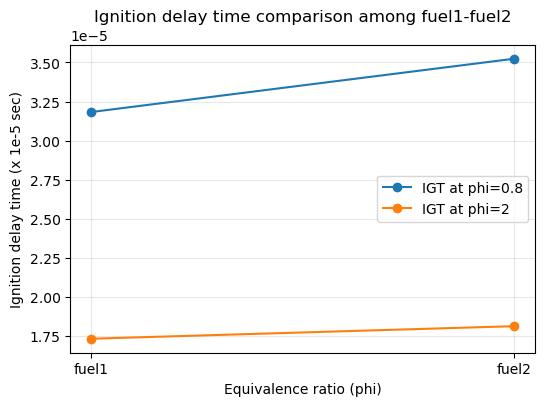

In [6]:
plt.figure(figsize=(6,4))
fuel = ['fuel1', 'fuel2']

tau_08 = [ignition_delay(data_fuel1[0.8], Y_ref), ignition_delay(data_fuel2[0.8], Y_ref)]
tau_2  = [ignition_delay(data_fuel1[2], Y_ref), ignition_delay(data_fuel2[2], Y_ref)]
plt.plot(fuel, tau_08, marker='o', label='IGT at phi=0.8')
plt.plot(fuel, tau_2, marker='o', label='IGT at phi=2')
plt.title('Ignition delay time comparison among fuel1-fuel2')
plt.xlabel('Equivalence ratio (phi)')
plt.ylabel('Ignition delay time (x 1e-5 sec)')
plt.legend() ; plt.grid(alpha=0.3)
# plt.savefig("plot_b-comparisonIDT.png", dpi=900)
plt.show()

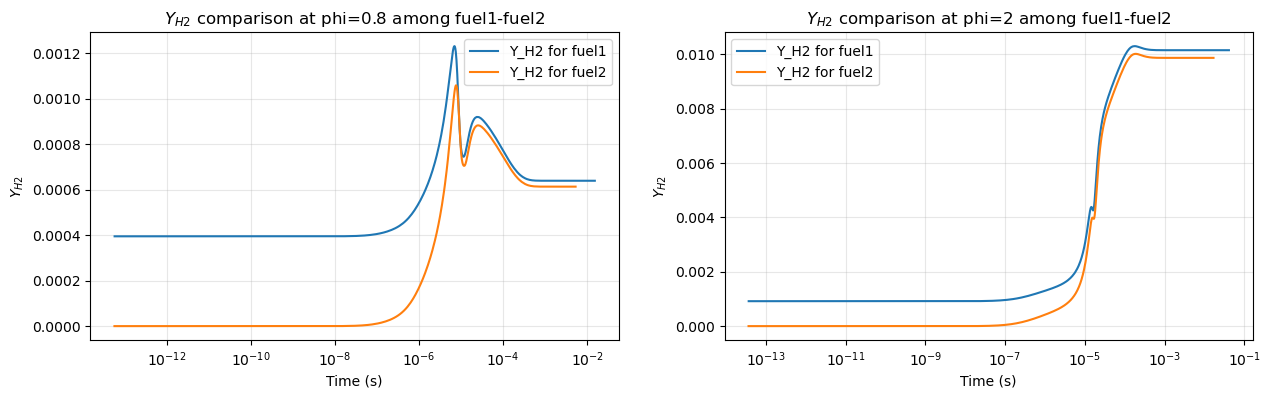

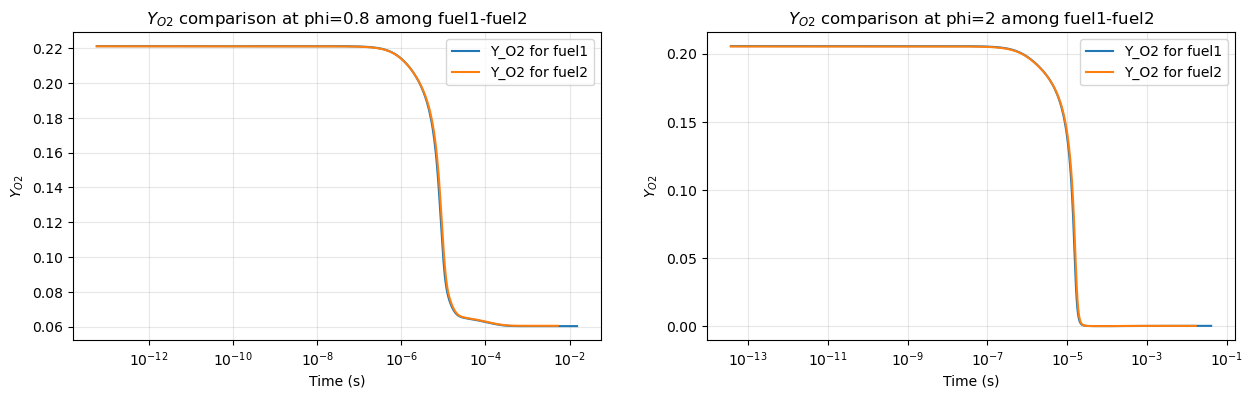

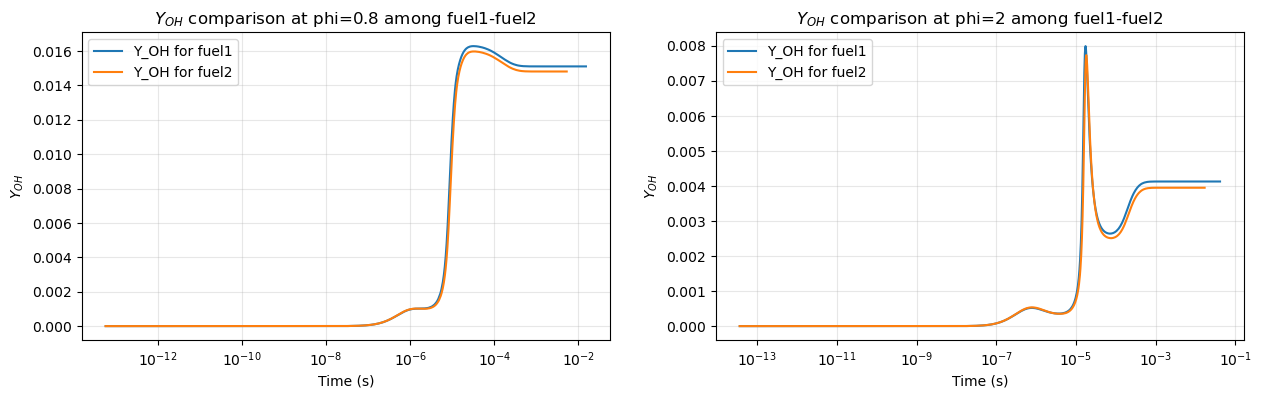

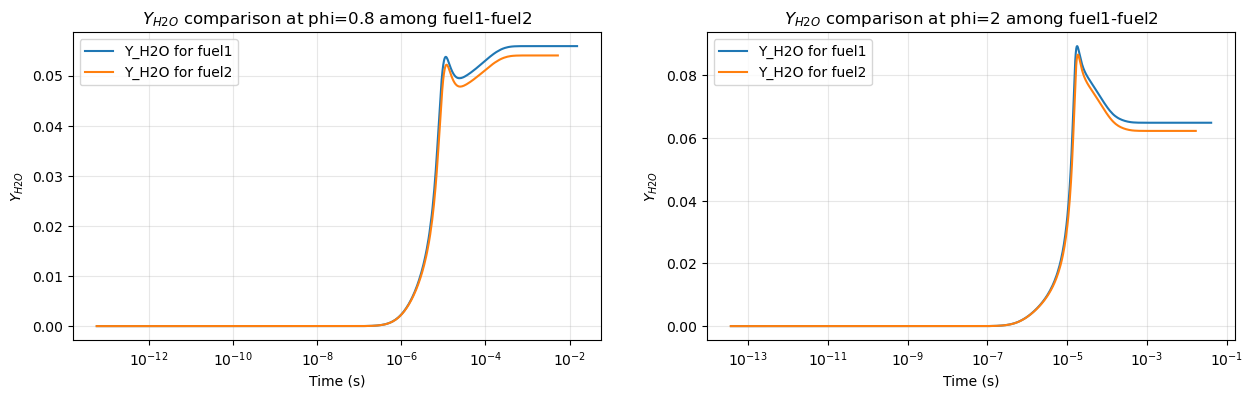

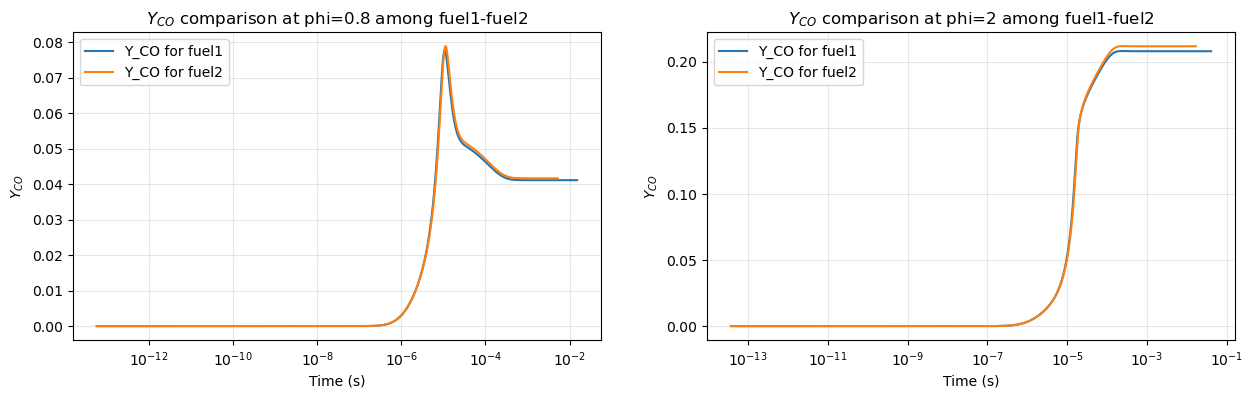

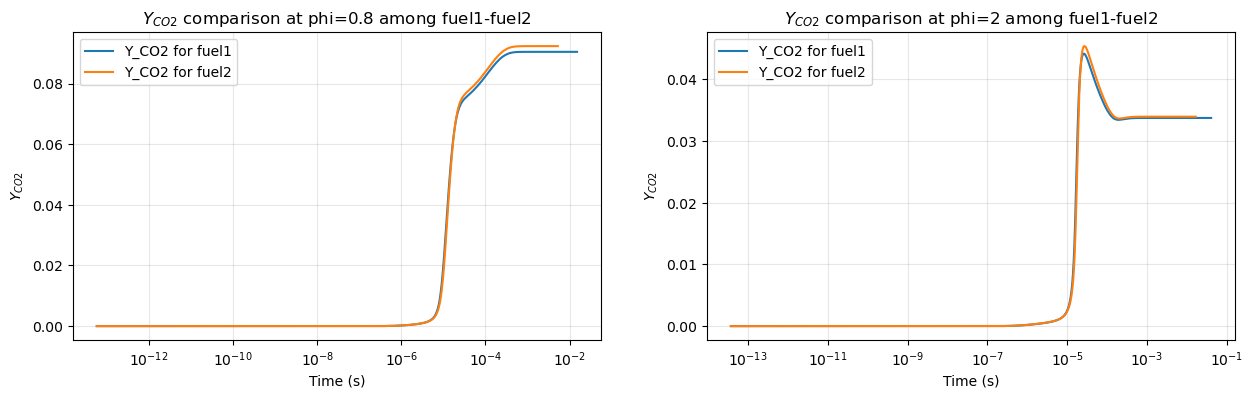

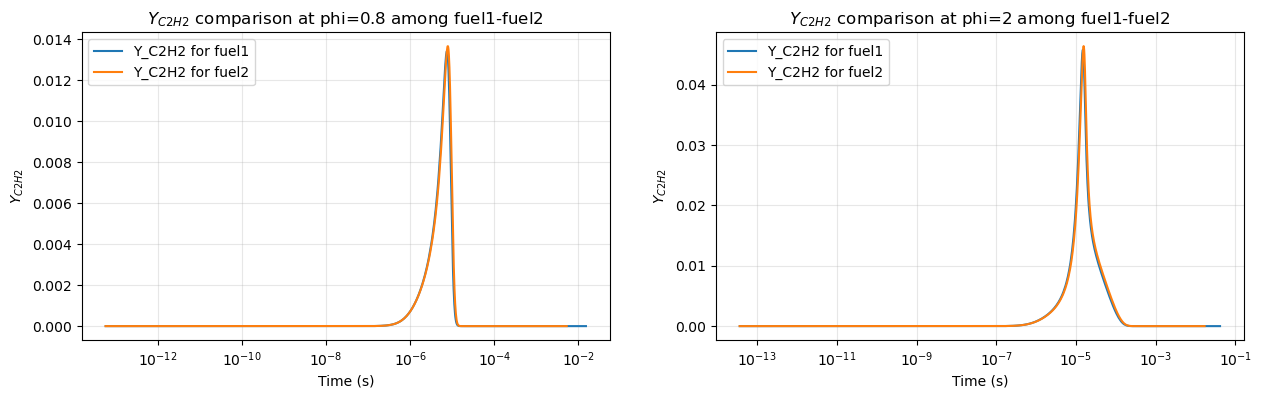

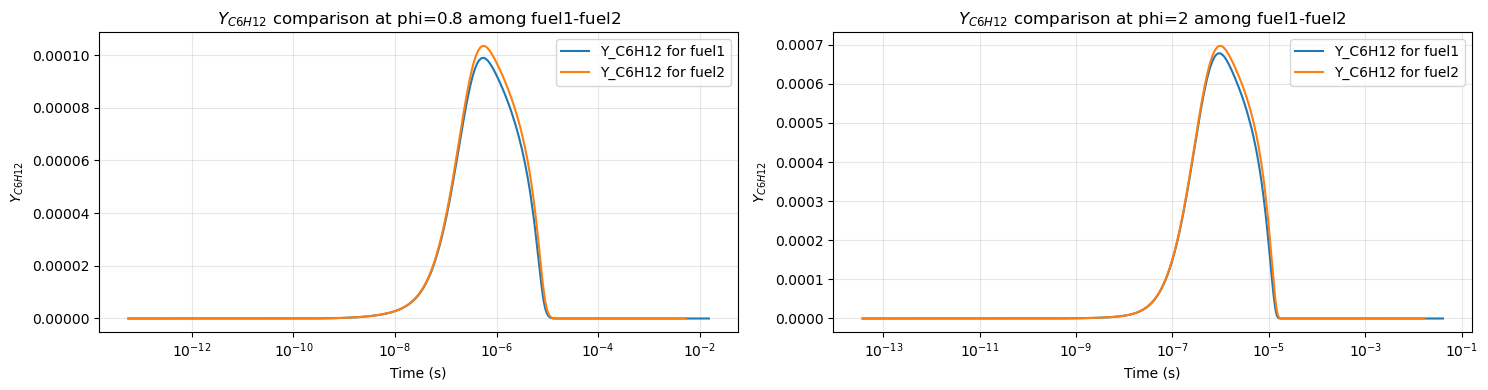

In [7]:
species_to_plot = ['H2', 'O2', 'OH', 'H2O', 'CO', 'CO2', 'C2H2', 'C6H12']
for spec in species_to_plot:
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    ax[0].plot(data_fuel1[0.8].t, data_fuel1[0.8](spec).Y, "-", label=f'Y_{spec} for fuel1')
    ax[0].plot(data_fuel2[0.8].t, data_fuel2[0.8](spec).Y, "-", label=f'Y_{spec} for fuel2')
    ax[1].plot(data_fuel1[2].t, data_fuel1[2](spec).Y, "-", label=f'Y_{spec} for fuel1')
    ax[1].plot(data_fuel2[2].t, data_fuel2[2](spec).Y, "-", label=f'Y_{spec} for fuel2')

    for i in range(2):
        ax[i].set_title(f"$Y_{{{spec}}}$" f' comparison at phi={phi_values[i]} among fuel1-fuel2')
        ax[i].set_xlabel("Time (s)")
        ax[i].set_ylabel(f"$Y_{{{spec}}}$")
        ax[i].legend()
        ax[i].grid(alpha=0.3)
        ax[i].set_xscale('log')
    # plt.savefig(f"plot_b-comparison{spec}.png", dpi=900)
plt.tight_layout()
plt.show()


## Exercise (c)

In [8]:
# solving (c)..................................

T0, phi = 1600, 0.8
pressure_range = np.linspace(1, 10, 10)               # 1 to 10 atm

# Storage for ignition delays
tau_cp = []
tau_cv = []

for p_val in pressure_range:
    gas = ct.Solution('SK54.yaml')
    gas.set_equivalence_ratio(phi, fuel1, air)
    gas.TP = T0, p_val*ct.one_atm

    # constant pressure reactor ---------------------
    r_cp = ct.IdealGasConstPressureReactor(gas)
    sim_cp = ct.ReactorNet([r_cp])
    states_cp = ct.SolutionArray(gas, extra=["t"])

    t = 0.0
    while t < 1.0:
        t = sim_cp.step()
        states_cp.append(r_cp.thermo.state, t=t)
        
    tau_cp.append(ignition_delay(states_cp, Y_ref))

    # constant volume reactor ------------------------------
    gas = ct.Solution('SK54.yaml')
    gas.set_equivalence_ratio(phi, fuel1, air)
    gas.TP = T0, p_val*ct.one_atm

    r_cv = ct.IdealGasReactor(gas)
    sim_cv = ct.ReactorNet([r_cv])
    states_cv = ct.SolutionArray(gas, extra=["t"])

    t = 0.0
    while t < 1.0:
        t = sim_cv.step()
        states_cv.append(r_cv.thermo.state, t=t)
        
    tau_cv.append(ignition_delay(states_cv, Y_ref))
    
    print(f"P = {p_val:4.1f} atm | IDT_CP = {tau_cp[-1]:.3e} s | IDT_CV = {tau_cv[-1]:.3e} s")


P =  1.0 atm | IDT_CP = 4.929e-05 s | IDT_CV = 2.738e-05 s
P =  2.0 atm | IDT_CP = 2.418e-05 s | IDT_CV = 1.433e-05 s
P =  3.0 atm | IDT_CP = 1.660e-05 s | IDT_CV = 1.016e-05 s
P =  4.0 atm | IDT_CP = 1.289e-05 s | IDT_CV = 8.053e-06 s
P =  5.0 atm | IDT_CP = 1.067e-05 s | IDT_CV = 6.778e-06 s
P =  6.0 atm | IDT_CP = 9.179e-06 s | IDT_CV = 5.911e-06 s
P =  7.0 atm | IDT_CP = 8.115e-06 s | IDT_CV = 5.276e-06 s
P =  8.0 atm | IDT_CP = 7.309e-06 s | IDT_CV = 4.795e-06 s
P =  9.0 atm | IDT_CP = 6.679e-06 s | IDT_CV = 4.412e-06 s
P = 10.0 atm | IDT_CP = 6.166e-06 s | IDT_CV = 4.096e-06 s


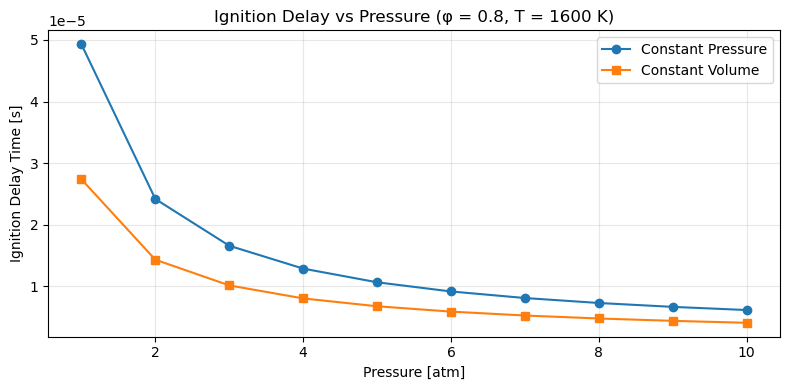

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(pressure_range, tau_cp, "o-", label="Constant Pressure")
plt.plot(pressure_range, tau_cv, "s-", label="Constant Volume")

plt.xlabel("Pressure [atm]")
plt.ylabel("Ignition Delay Time [s]")
plt.title("Ignition Delay vs Pressure (φ = 0.8, T = 1600 K)")
# plt.yscale("log")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
# plt.savefig("plot_c-IDTplot.png", dpi=900)
plt.show()

# Ignition delay decreases with increasing pressure
# Constant-volume ignition is faster than constant-pressure
#   --> due to temperature rise from compression during heat release
# Difference becomes larger at high pressure

## Exercise (d)

In [ ]:
# solving (d) ----------------------------------------

T0, P0 = 350, 1.5*ct.one_atm
phi_values = np.linspace(0.8, 1.3, 10)
sL = []
width = 0.03                                    # 3cm

for phi in phi_values:
    gas = ct.Solution("SK54.yaml")
    gas.set_equivalence_ratio(phi, fuel1, air)
    gas.TP = T0, P0

    flame = ct.FreeFlame(gas, width=width)
    flame.transport_model = 'mixture-averaged'
    flame.set_refine_criteria(ratio=3, slope=0.06, curve=0.12)
    flame.solve(loglevel=0, auto=True)
    sL.append(flame.velocity[0])

    print(f"phi = {phi:.2f} | sL = {flame.velocity[0]:.3f} m/s")
    

In [ ]:
def d_ans_eqv1(phii=1.0):
  gas2 = ct.Solution("SK54.yaml")
  T0, P0 = 350, 1.5*ct.one_atm
  gas2.set_equivalence_ratio(phii, fuel1, air)
  gas2.TP = T0, P0

  flame2 = ct.FreeFlame(gas2, width=0.03)
  flame2.transport_model = 'mixture-averaged'
  flame2.set_refine_criteria(ratio=3, slope=0.06, curve=0.12)
  flame2.solve(loglevel=0, auto=True)
  print(f"phii = {phii:.2f} | sL = {flame2.velocity[0]:.3f} m/s")
  return flame2.velocity[0]

ans = d_ans_eqv1()
print(ans)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(phi_values, sL, "o--")
plt.xlabel("Equivalence Ratio phi")
plt.ylabel("Laminar Burning Velocity sL [m/s]")
plt.title(f"Laminar Burning Velocity vs Equivalence Ratio\nFuel1, p = 1.5 atm, T = 350 K")
plt.grid(True, alpha=0.3)
plt.tight_layout()
# plt.savefig("plot_d_900dpi.png", dpi=900)
plt.show()

## Exercise (e)

In [ ]:
# solving (e) ----------------------------------
P0 = ct.one_atm
T0_values = [400, 470]
phi_values = np.linspace(0.8, 1.3, 10)

width = 0.03                              # 3 cm
sL_results = {}

for T0 in T0_values:
  sL = []

  for phi in phi_values:
    gas = ct.Solution("SK54.yaml")
    gas.set_equivalence_ratio(phi, fuel1, air)
    gas.TP = T0, P0

    flame = ct.FreeFlame(gas, width=width)
    flame.transport_model = "mixture-averaged"
    flame.set_refine_criteria(ratio=3, slope=0.06, curve=0.12)
    flame.solve(loglevel=0, auto=True)
    sL.append(flame.velocity[0])
    
    print(f"T0 = {T0:.0f} K | phi = {phi:.2f} | sL = {flame.velocity[0]:.3f} m/s")
  
  sL_results[T0] = sL

In [1]:
plt.figure(figsize=(8, 6))

for T0 in T0_values:
    plt.plot(phi_values, sL_results[T0], "o--", linewidth=2, label=f"T = {T0:.0f} K")

plt.xlabel("Equivalence Ratio phi")
plt.ylabel("Laminar Burning Velocity sL [m/s]")
plt.title("Effect of Initial Temperature on Laminar Burning Velocity\nFuel1, p = 1 atm")
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
# plt.savefig("plot_e_900dpi.png", dpi=900)
plt.show()

NameError: name 'plt' is not defined